## AI-Driven Optimal Placement of Electric Vehicles Charging Stations in Kenya

### Business Understanding 

#### Backgound Information & Overview

Kenya is undergoing a transportation and energy transformation, with electric vehicle (EV) adoption increasing due to rising fuel costs, government incentives, and a global push for sustainability efforts. However, the absence of a data-driven approach to charging station placement is slowing down EV adoption. Currently, charging station deployment is largely arbitrary, reactive, or limited to a few locations, leading to underutilization, range anxiety, and inefficient infrastructure investment.

#### Problem Statement

The adoption of electric vehicles (EVs) in Kenya is increasing, but the absence of a well-planned, optimized EV charging infrastructure remains a major barrier to widespread adoption. Current charging stations are placed without data-driven insights, leading to low utilization rates, inconvenient locations, and poor return on investment for operators.

* current number EV charging stations
* 

#### Proposed Solution

By integrating machine learning, geospatial analytics, and optimization models, this AI-driven platform will revolutionize EV infrastructure planning in Kenya. The solution ensures that charging stations are placed where they are most needed, cost-effective, and energy-efficient, paving the way for a sustainable and profitable EV ecosystem.

* Using K-Means Clustering, DBSCAN, and Hierarchical Clustering to help map out the best possible station locations based on geography and infrastructure constraints.
* Use Graph-based Routing and Dijkstra’s Algorithm to ensure stations are placed within an optimal travel distance for EV users. For example ensuring no driver needs to travel more than 5 km to find a charging station.
* Use Random Forest Regression, XGBoost, and Gradient Boosting Machines (GBM) to identify the key drivers of charging station demand based on traffic volume, population density, nearby commercial hubs, weather conditions and charging station accessibility.

#### Objectives

This project seeks to solve this by developing an AI-powered platform that leverages machine learning, geospatial data, and predictive analytics to identify optimal locations for EV charging stations.

The platform will enable:

* EV charging network planners to maximize utilization and profitability by selecting high-demand locations.
* Government agencies to accelerate green mobility initiatives through data-backed decision-making.
* Investors to make informed funding decisions, ensuring high ROI.
* EV users to access conveniently located charging stations, improving the overall user experience.

#### Metrics of Success

1. The model should correctly predict at least 90% of high-demand locations, minimizing false positives and negatives when identifying optimal sites. 
2. The model should achieve an R² score of at least 0.85, ensuring strong correlation between predicted and actual charging demand.
3. At least 80% of the suggested locations should be within 500 meters of a power grid connection, ensuring practical deployment feasibility.
4. The model should maintain an accuracy above 85% when tested on new urban areas, ensuring adaptability as Nairobi’s EV market grows.





### Data Understanding

The data is sourced from the U.S. Department of Transportation, Bureau of Transportation Statistics, about Electric Vehicle Public Charging Stations in the United States as of January 2020. Link - https://data-usdot.opendata.arcgis.com/datasets/alternative-fueling-stations/explore

### Importin the Relevant Libraries

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import Functions as Mf
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [28]:
import pandas as pd

#Alternative_Fueling_Stations.csv

# Load the first sheet into a DataFrame
df = pd.read_csv('Alternative_Fueling_Stations.csv')

# Display the first few rows to understand the structure
df.head()


C:\Users\Damaris\AppData\Local\Temp\ipykernel_23044\199429728.py:6: DtypeWarning: Columns (0,13,15,29,32,34,35,38,43,47,52,53,54,56,57,60,61,62,63,64,67,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Alternative_Fueling_Stations.csv')


,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
0,1,private,NaN,NaN,NaN,10/11/2024 12:00:00 AM,NaN,CNG,Private,17.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,2,private,NaN,GOVERNMENT,NaN,2/12/2024 12:00:00 AM,NaN,CNG,Private - Government only,45.0,...,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,3,private,NaN,NaN,NaN,12/13/2023 12:00:00 AM,NaN,CNG,Private,64.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,4,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,4/14/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,73.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,12/10/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,81.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706


In [29]:
df.shape

(97882, 80)

The dataset contains information about alternative fueling stations, including EV charging stations. Key columns relevant for EV Charging Station Placement Analysis include:

* access_code – Whether the station is public or private.
* access_days_time – Availability (e.g., 24-hour access).
* fuel_type_code – Identifies the fuel type (e.g., EV for Electric Vehicles).
* groups_with_access_code – Specifies access permissions.
* ev_pricing_fr – Pricing model for EV charging.
* ev_network_ids_station – Identifies the charging network.
* x, y – Longitude and Latitude coordinates of the station (for mapping).
* federal_agency_name – Indicates government or private ownership.

In [30]:
df['fuel_type_code'].value_counts()

fuel_type_code
ELEC    85398
E85      4719
LPG      2865
BD       1793
RD       1519
CNG      1372
LNG       112
HY        103
Name: count, dtype: int64

* From the above value_counts of the fuel_type_code, we are interested in the electrical vehicles. We proceed to filtering the dataframe for the 'ELEC' fuel_type_code.
* Some of the features are irrelevant to our analysis; First, determine the features of interest in the analysis and filter the dataframe accordingly.

In [31]:
df = df[df['fuel_type_code'] == 'ELEC']
df

,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
125,126,private,Fleet use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1517.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.387971,34.248319
126,127,public,5:30am-9pm; pay lot,NaN,NaN,1/10/2023 12:00:00 AM,NaN,ELEC,Public,1523.0,...,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,-118.271387,34.040539
127,128,private,For fleet and employee use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1525.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.248589,34.059133
128,129,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1531.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.096665,33.759802
129,130,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1552.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.265628,33.770508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97877,94193,public,24 hours daily,NaN,NaN,2/10/2025 12:00:00 AM,NaN,ELEC,Public,383892.0,...,NaN,Public,NaN,NaN,NaN,NaN,"[""""USCPIL17039901""""]","[""""26885821""""]",-96.987131,33.021393
97878,94194,public,NaN,NaN,NaN,2/10/2025 12:00:00 AM,NaN,ELEC,Public,383893.0,...,NaN,Public,NaN,NaN,NaN,NaN,"[""""b9364272-e5f2-11ef-ae25-42010aa40043""""]","[""7a0a7f85-629d-4585-ada1-6e13dcc1a5cd_1"",""80b...",-80.357119,25.598390
97879,94195,public,NaN,NaN,NaN,2/10/2025 12:00:00 AM,NaN,ELEC,Public,383894.0,...,NaN,Public,NaN,NaN,NaN,NaN,"[""""d43bff62-e5f2-11ef-9155-42010aa40043""""]","[""14b8de62-6110-44a7-a1e5-7f8fbfee2288_1"",""2a9...",-73.995734,40.674470
97880,94196,public,NaN,NaN,NaN,2/10/2025 12:00:00 AM,NaN,ELEC,Public,383895.0,...,NaN,Public,NaN,NaN,NaN,NaN,"[""""d4e30294-e5f2-11ef-96cf-42010aa40043""""]","[""3ae60df2-c3c0-46dc-86c2-52ce04a25b86_1"",""b52...",-122.281623,37.783456


In [32]:
# Display the columns
print(df.columns)

Index(['OBJECTID', 'access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id',
       'maximum_vehicle_class', 'open_date', 'owner_type_code',
       'restricted_access', 'status_code', 'funding_sources', 'facility_type',
       'station_name', 'station_phone', 'updated_at', 'geocode_status',
       'latitude', 'longitude', 'city', 'country', 'intersection_directions',
       'plus4', 'state', 'street_address', 'zip', 'bd_blends',
       'cng_dispenser_num', 'cng_fill_type_code', 'cng_has_rng', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'e85_blender_pump', 'e85_other_ethanol_blends',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'ev_workplace_charging',



Geographic Coordinates:

Latitude and Longitude: These are the geographic coordinates that specify the exact location of each charging station. They are crucial for mapping and spatial analysis, allowing you to visualize where charging stations are located and identify areas that may lack coverage.
Station Specifications:

Connector Types: This refers to the types of connectors available at the charging station (e.g., Type 1, Type 2, CCS, CHAdeMO). Different EV models require different types of connectors, so knowing what is available helps ensure compatibility with various vehicles.
Charging Levels: Charging stations can provide different levels of charging (e.g., Level 1, Level 2, DC Fast Charging). Level 1 is the slowest and typically uses a standard outlet, while Level 2 is faster and requires a dedicated charging unit. DC Fast Charging is the quickest option, allowing for rapid charging. Understanding these levels helps in determining the charging speed and convenience for users.
Access and Pricing Information:

Access Code: This indicates how users can access the charging station (e.g., open to the public, requires a membership, etc.). This information is important for understanding the usability of the station for potential EV users.
Pricing: This includes information on how much it costs to use the charging station. Pricing can influence user behavior and the overall attractiveness of a charging station. Knowing the pricing structure helps in assessing the economic viability of placing new stations.
Network Connectivity:

EV Network: This refers to the network or service provider that operates the charging station. Some networks may offer better coverage, reliability, or user experience than others. Understanding the network connectivity helps in evaluating the overall infrastructure and support available for EV users.
These elements are essential for making informed decisions about where to place new EV charging stations, ensuring they meet user needs and promote the adoption of electric vehicles in Kenya

In [33]:
relevant_columns = [
    'station_name', 'latitude', 'longitude', 'city', 'country', 'state',
    'street_address', 'status_code', 'access_code',
    'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num', 
    'ev_level2_evse_num', 'ev_network', 'ev_pricing'
]

Ev_df = df[relevant_columns]
Ev_df

,station_name,latitude,longitude,city,country,state,street_address,status_code,access_code,ev_connector_types,ev_dc_fast_num,ev_level1_evse_num,ev_level2_evse_num,ev_network,ev_pricing
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,US,CA,11797 Truesdale St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",2.0,NaN,57.0,SHELL_RECHARGE,NaN
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,US,CA,1201 S Figueroa St,E,public,"[""""J1772""""]",NaN,NaN,7.0,Non-Networked,Free; parking fee
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,US,CA,111 N Hope St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",12.0,NaN,338.0,Non-Networked,NaN
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,US,CA,6801 E 2nd St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",1.0,NaN,19.0,Non-Networked,NaN
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,US,CA,161 N Island Ave,E,private,"[""""J1772""""]",NaN,NaN,10.0,Non-Networked,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97877,SHOP CHARGING S SHOP 2,33.021393,-96.987131,Lewisville,US,TX,1547 S Stemmons Fwy,E,public,"[""""J1772""""]",NaN,NaN,1.0,ChargePoint Network,NaN
97878,Bay Point Rentals,25.598390,-80.357119,Miami,US,FL,18412 Homestead Ave,E,public,"[""""J1772""""]",NaN,NaN,7.0,CHARGELAB,NaN
97879,"Out of Service - Energy Conservation & Supply,...",40.674470,-73.995734,Brooklyn,US,NY,53 9th St,E,public,"[""""J1772""""]",NaN,NaN,10.0,CHARGELAB,NaN
97880,Out of Service - Dignity Moves,37.783456,-122.281623,Alameda,US,CA,2350 5th St,E,public,"[""""J1772""""]",NaN,NaN,2.0,CHARGELAB,NaN


Here’s an explanation of the columns/features listed:

station_name: The name of the electric vehicle (EV) charging station, typically identifying the location or brand of the station.

latitude: The geographic coordinate specifying the north-south position of the EV charging station on the Earth, in degrees.

longitude: The geographic coordinate specifying the east-west position of the EV charging station on the Earth, in degrees.

city: The name of the city where the EV charging station is located.

country: The country where the EV charging station is located.

state: The state or region where the EV charging station is located (if applicable).

street_address: The specific street address of the EV charging station, including building number, street name, and other location details.

status_code: A code that indicates the current status of the EV charging station, such as "Available," "Out of service," or "In use."

access_code: A code or identifier used to access the charging station, such as a PIN or card number for users to start a session.

ev_connector_types: The types of connectors available at the charging station, such as Type 1, Type 2, CCS, CHAdeMO, etc. These indicate which types of EVs can use the chargers.

ev_dc_fast_num: The number of DC fast chargers available at the station, which offer rapid charging for EVs.

ev_level1_evse_num: The number of Level 1 Electric Vehicle Supply Equipment (EVSE) units at the station, which provide slower charging, typically for residential or non-urgent use.

ev_level2_evse_num: The number of Level 2 EVSE units at the station, which provide faster charging than Level 1 and are commonly found in public charging networks.

ev_network: The name or identifier of the network that operates the charging station, such as Tesla Supercharger or ChargePoint.

ev_pricing: Information about the cost structure of using the charging station, such as per-minute, per-kWh, or membership pricing for access to the charging services.

In [34]:
(Ev_df.isna().sum() / len(Ev_df) * 100).sort_values(ascending=False)

ev_level1_evse_num    99.241200
ev_dc_fast_num        84.649523
ev_pricing            81.877796
ev_level2_evse_num    18.306049
ev_connector_types     4.359587
ev_network             4.334996
street_address         0.037472
city                   0.003513
station_name           0.001171
latitude               0.000000
longitude              0.000000
state                  0.000000
country                0.000000
status_code            0.000000
access_code            0.000000
dtype: float64

* Any column with more that 20% of missing value; should be dropped.
Rationale: the column, ev_level2_evse_num, is critical for our analysis, this the dropping threshold should cater to retain it.

In [35]:
df_Filtered = Ev_df.drop(columns = ['ev_level1_evse_num', 'ev_dc_fast_num', 'ev_pricing'], axis = 1)
df_Filtered

,station_name,latitude,longitude,city,country,state,street_address,status_code,access_code,ev_connector_types,ev_level2_evse_num,ev_network
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,US,CA,11797 Truesdale St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,US,CA,1201 S Figueroa St,E,public,"[""""J1772""""]",7.0,Non-Networked
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,US,CA,111 N Hope St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,US,CA,6801 E 2nd St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,US,CA,161 N Island Ave,E,private,"[""""J1772""""]",10.0,Non-Networked
...,...,...,...,...,...,...,...,...,...,...,...,...
97877,SHOP CHARGING S SHOP 2,33.021393,-96.987131,Lewisville,US,TX,1547 S Stemmons Fwy,E,public,"[""""J1772""""]",1.0,ChargePoint Network
97878,Bay Point Rentals,25.598390,-80.357119,Miami,US,FL,18412 Homestead Ave,E,public,"[""""J1772""""]",7.0,CHARGELAB
97879,"Out of Service - Energy Conservation & Supply,...",40.674470,-73.995734,Brooklyn,US,NY,53 9th St,E,public,"[""""J1772""""]",10.0,CHARGELAB
97880,Out of Service - Dignity Moves,37.783456,-122.281623,Alameda,US,CA,2350 5th St,E,public,"[""""J1772""""]",2.0,CHARGELAB


* Create a cleaning pipeline.
* Separate the dataframe into categorical and numerical columns.

In [36]:
numericals = df_Filtered.select_dtypes(include='number')
numericals['ev_level2_evse_num']

125       57.0
126        7.0
127      338.0
128       19.0
129       10.0
         ...  
97877      1.0
97878      7.0
97879     10.0
97880      2.0
97881      2.0
Name: ev_level2_evse_num, Length: 85398, dtype: float64

In [37]:
numericals.isnull().sum()

latitude                  0
longitude                 0
ev_level2_evse_num    15633
dtype: int64

* Check at the distribution of the numerical columns

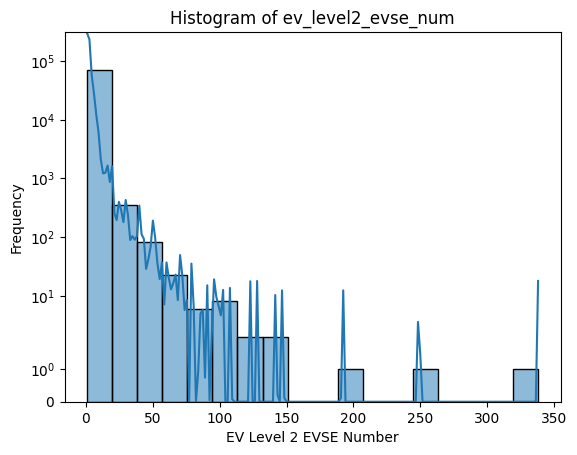

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_Filtered["ev_level2_evse_num"], bins='auto', kde=True)
plt.title("Histogram of ev_level2_evse_num")
plt.xlabel("EV Level 2 EVSE Number")
plt.ylabel("Frequency")
plt.yscale('symlog')

plt.show()


* Our graph is positively skewed, hence we will use median to impute on the missing values.

In [39]:
Mf.outliers(numericals) 

[('latitude', np.int64(513)),
 ('longitude', np.int64(0)),
 ('ev_level2_evse_num', np.int64(26025))]

* 

In [40]:
categoricals = df_Filtered.select_dtypes(include='object')
categoricals.columns

Index(['station_name', 'city', 'country', 'state', 'street_address',
       'status_code', 'access_code', 'ev_connector_types', 'ev_network'],
      dtype='object')

In [41]:
Ev_df['ev_connector_types'].nunique()

29

In [ ]:
X =
y =

In [ ]:
# splittig our data into x, y
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [26]:
# Creating a pipeline
transformer = ColumnTransformer([
    ("cat",Pipeline([
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ohe",OneHotEncoder())
        ]),categoricals),
    ("num",Pipeline([
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",MinMaxScaler())
        ]),numericals)
])

### Nairobi OpenStreet Road Netowrk Data

In [16]:
# Import OpenStreet Map
import osmnx as ox
# Import Geopandas for geospatial Information
import geopandas as gpd

# Define the target location
city = "Nairobi, Kenya"

# Fetch road network
G = ox.graph_from_place(city, network_type="drive")

# Convert to DataFrame
nodes, edges = ox.graph_to_gdfs(G)
#edges.to_csv("nairobi_roads.csv")
print("✅ Nairobi road data saved!")


ModuleNotFoundError: No module named 'osmnx'

In [ ]:
### Loading OpenStreet Nairobi Data

data = pd.read_csv('nairobi_roads.csv')

data.head()

This dataset describes Nairobi's road network, with relevant features such as:

* osmid (OpenStreetMap ID)
* highway (road type classification)
* length (road segment length)
* geometry (road segment coordinates)
* lanes (number of lanes)
* junction (whether it's a roundabout or intersection)
* maxspeed (speed limits)

### Tailoring U.S.A data for Kenya

Since the dataset originates from the US, we need to extract only relevant data that can be adapted to the Kenyan context.

1. Filter only EV-related data: Remove non-EV stations (e.g., CNG, LPG) and retain stations where fuel_type_code = EV.
2. Extract relevant columns: Focus on features that can be applied in Kenya, such as:
    * access_code (public/private)
    * ev_pricing_fr (if pricing models are useful)
    * x, y (longitude and latitude)
    * ev_network_ids_posts (charging infrastructure details)
3. Find similar land-use patterns in Kenya (e.g., CBD, highways, malls).
4. Use Nairobi road network data to determine high-traffic areas.
5. Compare US charging station clustering patterns to predict optimal locations in Nairobi.